In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
 import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split



# Correct dataset path (including the subfolder)
original_dataset_dir = r"C:\Users\renuk\Downloads\crop"

# Define new dataset paths
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Create train and validation directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Print class folders
print("Classes found:", os.listdir(original_dataset_dir))

# Iterate over each class folder
for class_name in os.listdir(original_dataset_dir):
    class_dir = os.path.join(original_dataset_dir, class_name)
    
    # Ensure it's a directory
    if os.path.isdir(class_dir):
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

        # Get all image files (only jpg, png, jpeg)
        images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Check if there are images before splitting
        if len(images) == 0:
            print(f"Skipping {class_name}, no images found.")
            continue

        # Split images into train (80%) and val (20%)
        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

           # Move images to train folder
        for image in train_images:
            shutil.copy(os.path.join(class_dir, image), os.path.join(train_class_dir, image))  # Copy instead of Move

# Move images to validation folder
        for image in val_images:
            shutil.copy(os.path.join(class_dir, image), os.path.join(val_class_dir, image))  # Copy instead of Move


        print(f"Processed {class_name}: {len(train_images)} train, {len(val_images)} validation images.")

print("Dataset successfully split into training and validation sets!")

# Image Data Generators (optimized for performance)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,  # Reduced batch size for lower memory usage
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical')

# Model Architecture (Simple CNN for better performance on CPU/GPU)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with limited epochs (1 or 2 for testing)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=2,  # Reduced epochs for faster training
    verbose=1
)

# Save the model
model.save("plant_disease_model.h5")
print("Model training complete and saved as 'plant_disease_model.h5'")




Classes found: ['file_renamer.py', 'folder_renamer.py', 'test', 'train']
Skipping test, no images found.
Skipping train, no images found.
Dataset successfully split into training and validation sets!
Found 16146 images belonging to 20 classes.
Found 4191 images belonging to 20 classes.
Epoch 1/2
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 931s 918ms/step - accuracy: 0.4962 - loss: 1.7621 - val_accuracy: 0.7442 - val_loss: 0.7583
Epoch 2/2
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 636s 629ms/step - accuracy: 0.6930 - loss: 0.9266 - val_accuracy: 0.7454 - val_loss: 0.8131


Model training complete and saved as 'plant_disease_model.h5'


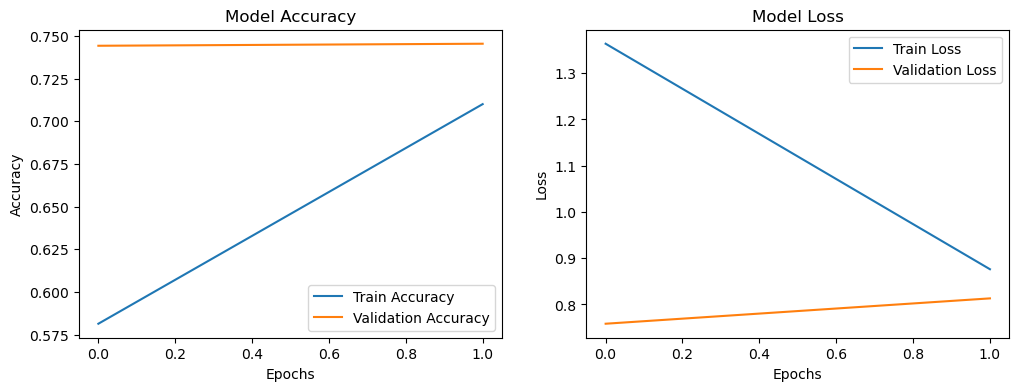

In [16]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


203/262 ━━━━━━━━━━━━━━━━━━━━ 21s 371ms/step - accuracy: 0.7381 - loss: 0.8108 

In [82]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load an image for testing
img_path = r"C:\Users\renuk\Downloads\crop1.png"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Get class labels
class_labels = list(train_generator.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Class: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


In [1]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("plant_disease_model.h5")

# Verify model is working
print("Model reloaded successfully!")


Model reloaded successfully!


In [5]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("plant_disease_model.h5")

# Convert to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open("plant_disease_model.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved successfully as 'plant_disease_model.tflite'")



INFO:tensorflow:Assets written to: C:\Users\renuk\AppData\Local\Temp\tmp5wldzfgr\assets


INFO:tensorflow:Assets written to: C:\Users\renuk\AppData\Local\Temp\tmp5wldzfgr\assets


Saved artifact at 'C:\Users\renuk\AppData\Local\Temp\tmp5wldzfgr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer_7')
Output Type:
  TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)
Captures:
  2493019146192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2493019148112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2493019147920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2493019148880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2493019148304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2493019149840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2493019149072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2493019151376: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model saved successfully as 'plant_disease_model.tflite'


In [37]:
import collections

class_counts = collections.Counter(train_generator.classes)
print("Class distribution in training set:", class_counts)



Class distribution in training set: Counter({15: 4349, 3: 1483, 4: 1201, 12: 1106, 8: 953, 11: 944, 10: 929, 13: 860, 5: 841, 9: 788, 6: 683, 1: 537, 0: 504, 7: 410, 14: 338, 2: 220})
